# Paso 1. Descargar los datos
**Model Fitness te aportó archivos CSV que contienen los datos sobre la cancelación de un mes en concreto e información del mes que lo precedía. El dataset incluye los siguientes campos:**
- 'Churn' — la cancelación para el mes en cuestión

- Campos de dataset actuales:
    - Datos del usuario del mes anterior
    - 'gender'.
    - 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
    - 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
    - Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
    - 'Phone' — si el/la usuario/a aportó el número de teléfono.
    - 'Age'.
    - 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.

**Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:**
- 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
- 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
- 'Group_visits' — si el/la usuario/a participa en sesiones grupales.
- 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.
- 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.
- 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

## Llevar a cabo el análisis exploratorio de datos (EDA)
- Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).
- Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).
- Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
- Crea una matriz de correlación y muéstrala.

# Paso 3. Construir un modelo para predecir la cancelación de usuarios
- Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

##  Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
- Entrena el modelo en el set de entrenamiento con dos métodos:
    - regresión logística;
    - bosque aleatorio.
- Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?
- Recuerda indicar el parámetro random_state cuando dividas los datos y definas el algoritmo.

# Paso 4. Crear clústeres de usuarios/as
- Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

## Estandariza los datos.
- ***Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.**
- **Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)**
- Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?
- Traza distribuciones de características para los clústeres. ¿Notas algo?
- Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?
# Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes
**Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.**

No necesitas entrar en detalles. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.

Celda de texto <undefined>
# %% [markdown]
# Paso 1. Descargar los datos
**Model Fitness te aportó archivos CSV que contienen los datos sobre la cancelación de un mes en concreto e información del mes que lo precedía. El dataset incluye los siguientes campos:**
- 'Churn' — la cancelación para el mes en cuestión

- Campos de dataset actuales:
    - Datos del usuario del mes anterior
    - 'gender'.
    - 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
    - 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
    - Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
    - 'Phone' — si el/la usuario/a aportó el número de teléfono.
    - 'Age'.
    - 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.

## Llevar a cabo el análisis exploratorio de datos (EDA)
  - Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).
- Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).
- Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
- Crea una matriz de correlación y muéstrala.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
from IPython.display import display
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from datetime import datetime
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [3]:
gym = pd.read_csv("/content/gym_churn_us.csv", delimiter=',')
gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [4]:
# Convertir columnas de mayusculas a minusculas
gym.columns = gym.columns.str.lower()

gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [5]:
# Convertir columnas a los tipos correspondientes
gym = gym.astype({
    'gender': 'string',                      # Género como texto
    'near_location': 'bool',                 # Vive cerca del gimnasio
    'partner': 'bool',                       # Trabaja en empresa asociada
    'promo_friends': 'bool',                 # Usó promoción "trae un amigo"
    'phone': 'bool',                         # Proporcionó número de teléfono
    'age': 'int64',                          # Edad en años
    'lifetime': 'int64',                     # Meses desde la primera visita
    'contract_period': 'int64',              # Período del contrato en meses
    'month_to_end_contract': 'int64',        # Meses restantes del contrato
    'group_visits': 'bool',                  # Participa en sesiones grupales
    'avg_class_frequency_total': 'float64',  # Frecuencia media total (por semana)
    'avg_class_frequency_current_month': 'float64',  # Frecuencia media actual (por semana)
    'avg_additional_charges_total': 'float64',       # Gastos en servicios adicionales
    'churn': 'bool'                          # Variable objetivo (cancelación)
})

# Verificar la información de las columnas
print(gym.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   string 
 1   near_location                      4000 non-null   bool   
 2   partner                            4000 non-null   bool   
 3   promo_friends                      4000 non-null   bool   
 4   phone                              4000 non-null   bool   
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   bool   
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [6]:
# Verificar la cantidad de valores nulos en cada columna
nulos = gym.isnull().sum()

# Mostrar columnas con valores nulos
display("Valores nulos por columna:")
display(nulos)

# Verificar si hay algún valor nulo en todo el DataFrame
hay_nulos = gym.isnull().any().any()
display(f"¿Hay valores nulos en el DataFrame? {'Sí' if hay_nulos else 'No'}")

'Valores nulos por columna:'

,0
gender,0
near_location,0
partner,0
promo_friends,0
phone,0
contract_period,0
group_visits,0
age,0
avg_additional_charges_total,0
month_to_end_contract,0


'¿Hay valores nulos en el DataFrame? No'

In [7]:
# Verificar si hay filas duplicadas
duplicados = gym.duplicated().sum()


display(f"Cantidad de filas duplicadas: {duplicados}")

'Cantidad de filas duplicadas: 0'

## **Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).**

In [8]:
# Resumen estadístico de todas las columnas numéricas
estadisticas = gym.describe()

# Mostrar el resumen
display("Estadísticas descriptivas:")
display(estadisticas)


'Estadísticas descriptivas:'

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.681250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052
std,4.549706,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,6.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


In [9]:
# Resumen estadístico incluyendo todas las columnas
estadisticas_completas = gym.describe(include='all')


display(estadisticas_completas)


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000,4000,4000,4000,4000,4000.000000,4000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000
unique,2,2,2,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2
top,1,True,False,False,True,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,2041,3381,2053,2766,3614,NaN,2351,NaN,NaN,NaN,NaN,NaN,NaN,2939
mean,NaN,NaN,NaN,NaN,NaN,4.681250,NaN,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,NaN
std,NaN,NaN,NaN,NaN,NaN,4.549706,NaN,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,NaN
75%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,NaN


### Análisis Exploratorio de Datos (EDA)
- 1. Características ausentes: El dataset no contiene valores nulos explícitos, ya que todas las columnas muestran un conteo de 4000 registros. Sin embargo, se detectaron valores categóricos con números únicos que podrían indicar datos ausentes o booleanos.

### Variables categóricas:

- gender: 2 valores únicos ('1' y '2'), podrían representar géneros codificados.
near_location, partner, promo_friends, phone: 2 valores únicos (true, false), indican booleanos.
Variables numéricas:

No se reportan valores nulos en las columnas numéricas.
- 2. Estadísticas descriptivas:

### Promedios y rangos:

- age: Promedio de 29 años, con un rango de 18 a 41 años.
- avg_additional_charges_total: Promedio de 146.94, rango de 0 a 552.50.
- month_to_end_contract: Promedio de 4.19 meses, rango de 1 a 12 meses.
- avg_class_frequency_total: Frecuencia promedio de 1.87 visitas/semana, con un máximo de 6.62.
- avg_class_frequency_current_month: Frecuencia promedio de 1.76 visitas/semana, con un máximo de 6.14.

### Desviaciones estándar (variabilidad):

- age: Desviación estándar de 3.25 años, indicando que la mayoría de los usuarios tienen una edad cercana al promedio.
- avg_additional_charges_total: Desviación estándar de 96.36, indicando variabilidad significativa en gastos adicionales.
- month_to_end_contract: Desviación estándar de 4.32, lo que sugiere gran dispersión en los tiempos restantes de contrato.

### Distribución del churn (churn):

- Los valores se dividen en true y false. La mayoría de los usuarios no cancelaron su membresía (2391 frente a 1609 que sí lo hicieron).
***Conclusión preliminar: Los datos parecen bien estructurados, pero hay cierta variabilidad en los valores numéricos como las frecuencias de visita y los gastos adicionales. Este análisis inicial proporciona una base para profundizar en correlaciones y patrones.***

##  **Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).**

In [10]:
# Calcular los valores medios de las características para cada grupo
mean_values = gym.groupby('churn').mean(numeric_only=True)

display(mean_values)

,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,
False,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
True,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


## **Análisis de los valores medios de las características según el estado de cancelación (Churn)**
Se analizaron las características de los usuarios del gimnasio separando los datos en dos grupos: aquellos que cancelaron su membresía (Churn = True) y aquellos que permanecieron (Churn = False). A continuación, se presentan las principales observaciones:

- Ubicación cercana (near_location):
Los usuarios que viven o trabajan cerca del gimnasio tienen una mayor probabilidad de permanecer (promedio 0.87) en comparación con los que cancelaron (promedio 0.78). Esto sugiere que la proximidad al gimnasio podría ser un factor clave en la retención.

- Afiliación con empresas asociadas (partner):
Los usuarios afiliados a empresas asociadas muestran una mayor tasa de permanencia (promedio 0.43) en comparación con aquellos que cancelaron (promedio 0.35). Los descuentos para empleados parecen contribuir a la retención.

- Promociones de amigos (promo_friends):
Los usuarios que se inscribieron mediante la promoción "trae a un amigo" tienen tasas de permanencia ligeramente mayores (promedio 0.35) que aquellos que cancelaron (promedio 0.18).

- Número de teléfono proporcionado (phone):
La proporción de usuarios que proporcionaron su número de teléfono es similar en ambos grupos, lo que indica que este factor no tiene un impacto significativo en la cancelación.

- Período de contrato (contract_period):
Los usuarios que permanecieron tienen contratos más largos en promedio (5.77 meses) que aquellos que cancelaron (1.72 meses). Esto sugiere que los contratos más largos pueden fomentar la retención.

- Edad (age):
Los usuarios que permanecieron son ligeramente mayores en promedio (29.07 años) en comparación con los que cancelaron (26.99 años).

- Gastos adicionales (avg_additional_charges_total):
Los usuarios que permanecieron gastaron más en servicios adicionales del gimnasio (promedio 118.48) que aquellos que cancelaron (promedio 115.08).

- Frecuencia de clases:
La frecuencia promedio total de clases es mayor en los usuarios que permanecieron (2.02 visitas semanales) en comparación con los que cancelaron (1.47 visitas semanales).
De manera similar, la frecuencia de clases en el mes actual es mayor en quienes permanecieron (2.01 visitas semanales) frente a los que cancelaron (1.04 visitas semanales).

- Duración de membresía (lifetime):
Los usuarios que permanecieron tienen una vida útil promedio en el gimnasio más larga (4.71 meses) en comparación con aquellos que cancelaron (0.93 meses).


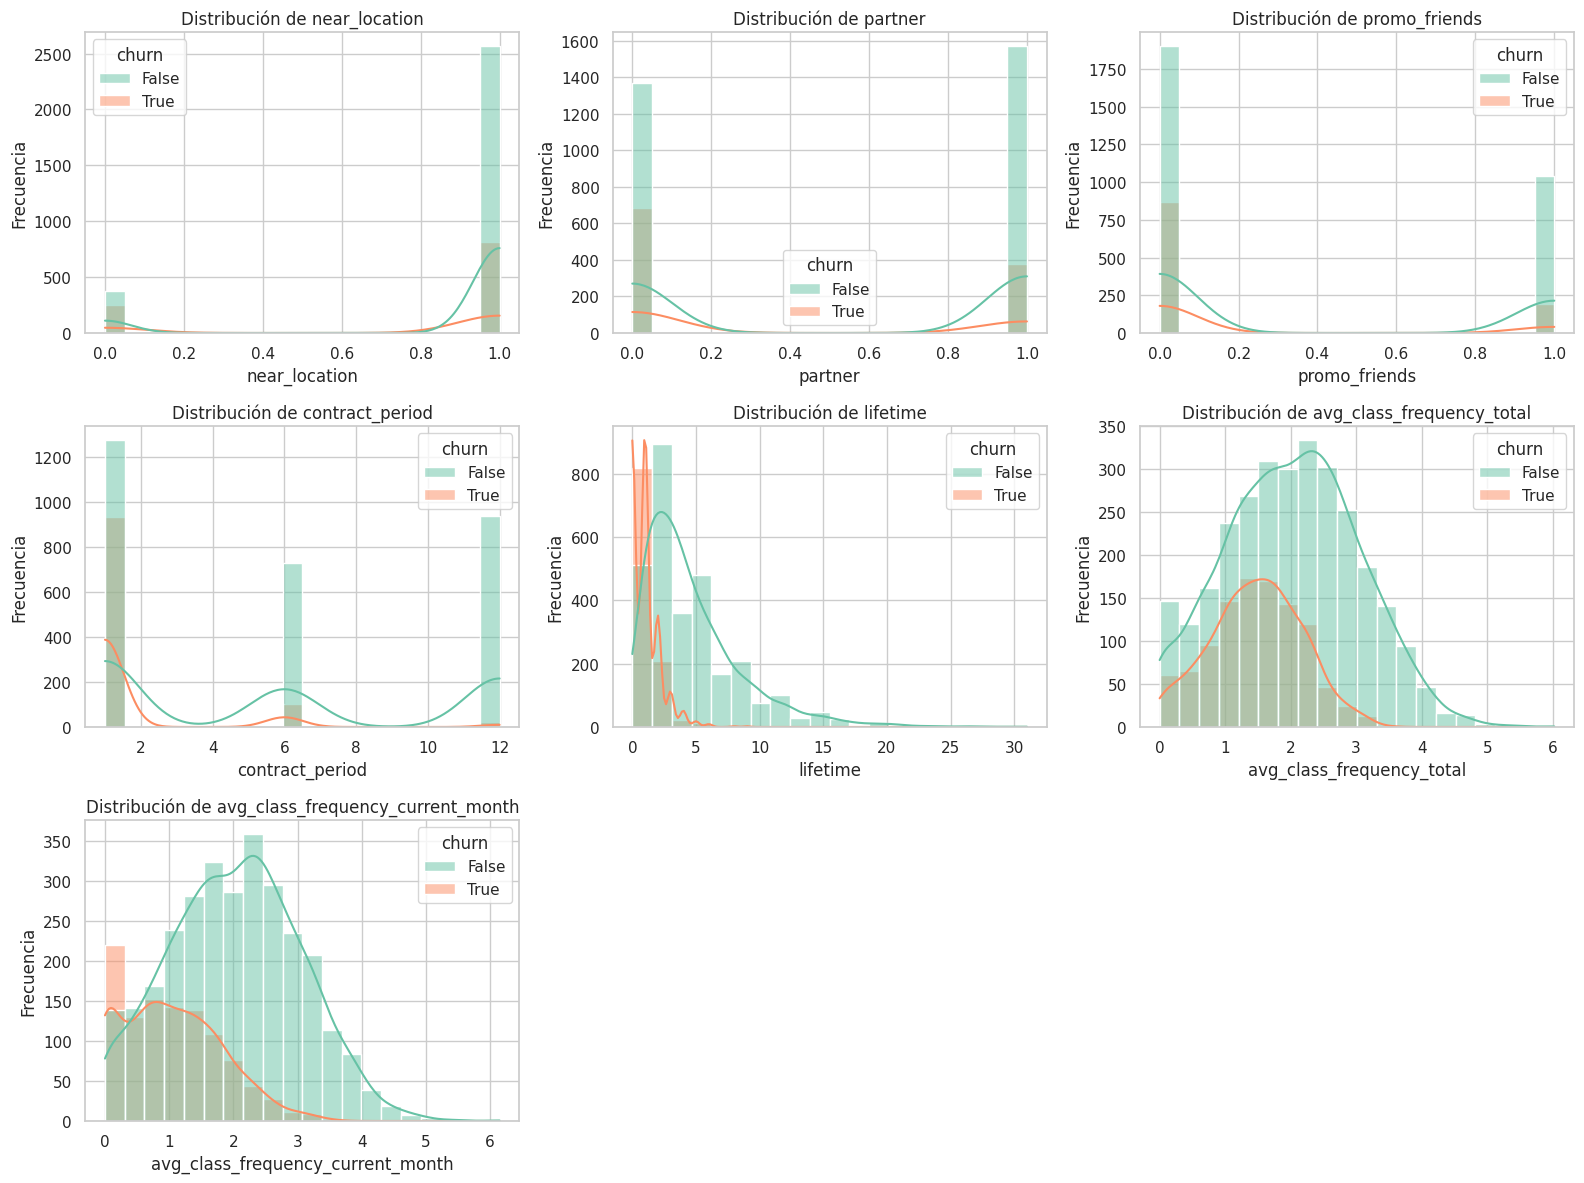

In [11]:
# Configuración general de estilo
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Características a analizar
features = [
    'near_location', 'partner', 'promo_friends', 'contract_period',
    'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'
]

# Crear histogramas para cada característica
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    # Change 'Churn' to 'churn' for the hue parameter
    sns.histplot(data=gym, x=feature, hue='churn', kde=True, palette='Set2', bins=20)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### **Análisis de las distribuciones según la cancelación**
**Se analizaron las características de los usuarios para identificar diferencias entre quienes cancelaron su membresía (churn = True) y quienes permanecieron (churn = False):**

- **Proximidad al gimnasio (near_location):** Los usuarios que viven cerca del gimnasio tienden a permanecer más tiempo activos.
- **Afiliación a empresas asociadas (partner):** Estar afiliado a empresas asociadas está relacionado con una menor tasa de cancelación.
- **Promociones con amigos (promo_friends):** Las promociones con amigos aumentan la retención de usuarios.
- **Duración del contrato (contract_period):** Los contratos más largos reducen significativamente la probabilidad de cancelación.
- **Tiempo de membresía (lifetime):** Usuarios con más tiempo como miembros muestran menor tendencia a cancelar.
- **Frecuencia de asistencia total y mensual:** Una mayor frecuencia de asistencia, tanto histórica como reciente, está relacionada con una mayor retención.

### **Conclusión**
Factores como la duración del contrato, la frecuencia de asistencia y las promociones tienen un impacto positivo en la retención, mientras que los contratos cortos y la baja frecuencia de visitas aumentan la probabilidad de cancelación.

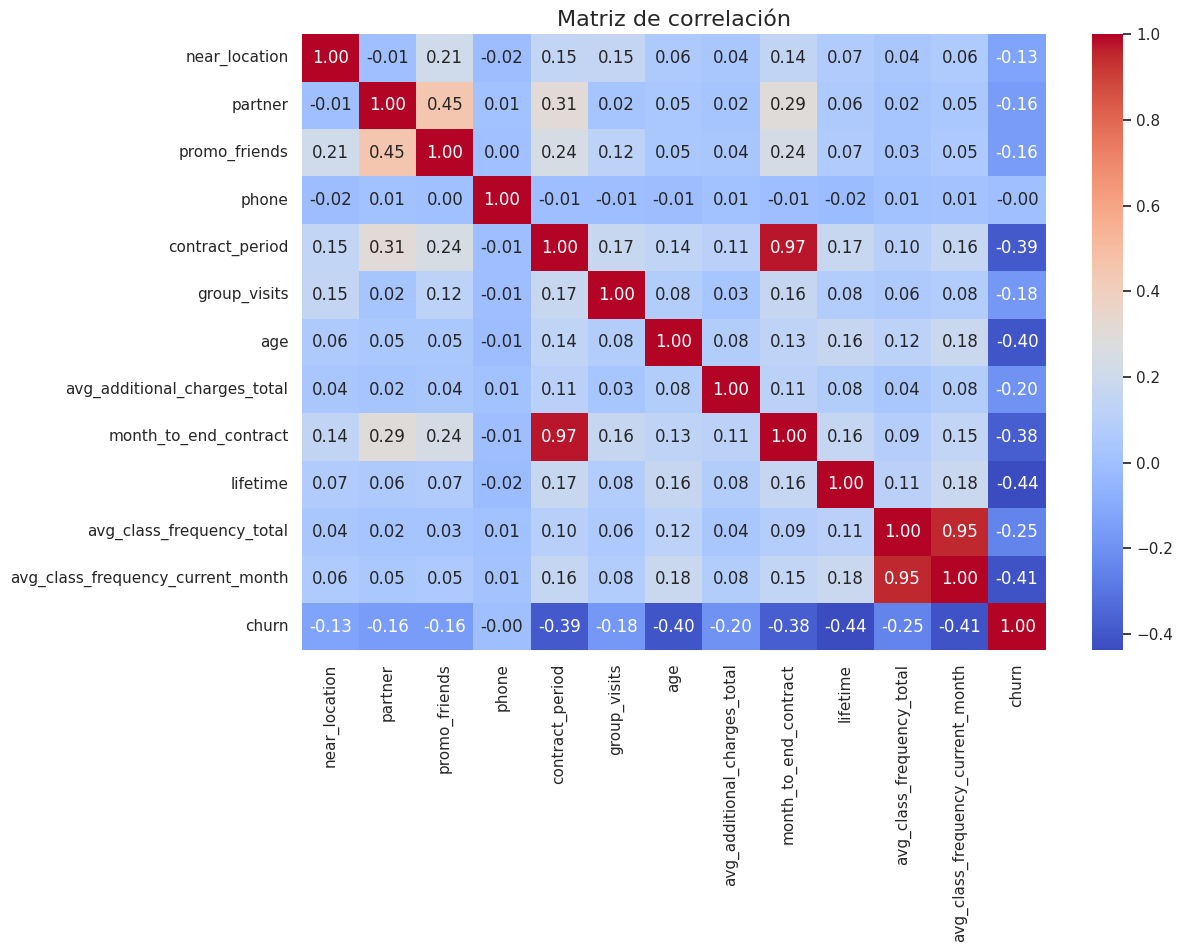

In [12]:
# Crear la matriz de correlación
correlation_matrix = gym.corr(numeric_only=True)

# Configuración del gráfico
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Títulos
plt.title("Matriz de correlación", fontsize=16)
plt.show()


## **Observaciones principales:**
### 1.- Factores más importantes para evitar cancelaciones (churn):

- **lifetime (-0.44):** Los clientes con más tiempo en el gimnasio son menos propensos a cancelar.
- **contract_period (-0.39) y month_to_end_contract (-0.38):** Contratos más largos y con más tiempo restante reducen la probabilidad de cancelación.
- **age (-0.40):** Los clientes mayores tienen menos tendencia a cancelar.
- **avg_class_frequency_current_month (-0.41):** Una mayor asistencia reciente está asociada con menor cancelación.
### 2.-**Relaciones más fuertes entre variables:**

- **contract_period y month_to_end_contract (0.97):** Directamente relacionadas, como era de esperarse.
- **avg_class_frequency_total y avg_class_frequency_current_month (0.95):** Usuarios con alta asistencia promedio tienden a mantener este hábito.
### 3.-**Relaciones débiles:**

- **near_location (-0.13):** Vivir cerca del gimnasio tiene una leve relación negativa con la cancelación.
- **phone:** Sin relación significativa con otras variables o con la cancelación.
#### **Conclusión:**
Las variables relacionadas con el tiempo total en el gimnasio, la duración y los meses restantes del contrato, la edad y la frecuencia de asistencia son los factores más relevantes para explicar la probabilidad de cancelación. Variables como el número telefónico o promociones tienen un impacto insignificante.

# Paso 3. Construir un modelo para predecir la cancelación de usuarios
Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

- Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
- Entrena el modelo en el set de entrenamiento con dos métodos:
  - regresión logística;
  - bosque aleatorio.
- Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

Recuerda indicar el parámetro random_state cuando dividas los datos y definas el algoritmo.

In [13]:
# Definir las características (X) y la variable objetivo (y)
X = gym.drop(columns=['churn'])  # Todas las columnas excepto la de 'Churn'
y = gym['churn']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,  # 20% de los datos para validación
    random_state=42,  # Semilla para resultados reproducibles
    stratify=y  # Mantener proporciones de clases en los conjuntos
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_valid:", X_valid.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_valid:", y_valid.shape)



Tamaño de X_train: (3200, 13)
Tamaño de X_valid: (800, 13)
Tamaño de y_train: (3200,)
Tamaño de y_valid: (800,)


**Conjunto de entrenamiento (X_train, y_train): contiene 3200 registros y 14 características, además de la variable objetivo (Churn).**

**Conjunto de validación (X_valid, y_valid): contiene 800 registros con las mismas columnas y la variable objetivo.**

Esto significa que el 80% de los datos se utilizó para entrenamiento y el 20% para validación, como lo especificamos. La estructura de los datos es adecuada para entrenar un modelo de predicción.




### **Entrenar el modelo en el set de entrenamiento con dos métodos:**
### - *regresión logística*


In [14]:
# Crear una instancia del modelo de regresión logística
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento
logistic_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred_logistic = logistic_model.predict(X_valid)

# Evaluar el modelo
accuracy = accuracy_score(y_valid, y_pred_logistic)
display(f"Exactitud del modelo de Regresión Logística: {accuracy:.2f}")

# Reporte de clasificación
display("\nReporte de Clasificación para Regresión Logística:")
display(classification_report(y_valid, y_pred_logistic))


'Exactitud del modelo de Regresión Logística: 0.92'

'\nReporte de Clasificación para Regresión Logística:'

'              precision    recall  f1-score   support\n\n       False       0.94      0.96      0.95       588\n        True       0.88      0.83      0.85       212\n\n    accuracy                           0.92       800\n   macro avg       0.91      0.89      0.90       800\nweighted avg       0.92      0.92      0.92       800\n'

##Métricas clave:
**Precisión (Precision):**

- Para False (clientes que no cancelaron): 0.94 significa que el 94% de las veces que el modelo predijo que un cliente no cancelaría, fue correcto.
- Para True (clientes que cancelaron): 0.89 significa que el 89% de las veces que el modelo predijo cancelación, fue correcto.

**Exhaustividad (Recall):**

- Para False: 0.96 indica que el modelo identificó correctamente al 96% de los clientes que realmente no cancelaron.
- Para True: 0.83 indica que el modelo identificó correctamente al 83% de los clientes que realmente cancelaron.

**F1-score:**

- Para False: 0.95 (un equilibrio entre precisión y recall).
- Para True: 0.86 (un poco más bajo, pero aceptable).

**Exactitud total (Accuracy):**

- 0.93 (93%): El modelo clasifica correctamente el 93% de los casos.

**Observaciones:**
El modelo tiene un buen desempeño general, pero el recall para los clientes que cancelaron (True) es un poco más bajo, lo que significa que algunos clientes en riesgo de cancelación no están siendo detectados.

### *bosque aleatorio.*

In [15]:
# Crear una instancia del modelo de Bosque Aleatorio
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

# Entrenar el modelo con los datos de entrenamiento
random_forest_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred_rf = random_forest_model.predict(X_valid)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_valid, y_pred_rf)
display(f"Exactitud del modelo de Bosque Aleatorio: {accuracy_rf:.2f}")

# Reporte de clasificación
display("\nReporte de Clasificación para Bosque Aleatorio:")
display(classification_report(y_valid, y_pred_rf))

'Exactitud del modelo de Bosque Aleatorio: 0.93'

'\nReporte de Clasificación para Bosque Aleatorio:'

'              precision    recall  f1-score   support\n\n       False       0.94      0.97      0.95       588\n        True       0.90      0.83      0.86       212\n\n    accuracy                           0.93       800\n   macro avg       0.92      0.90      0.91       800\nweighted avg       0.93      0.93      0.93       800\n'

## Métricas clave:

**Precisión (Precision):**
- Para False (clientes que no cancelaron): 0.94 muestra un alto nivel de precisión.
- Para True (clientes que cancelaron): 0.88 es ligeramente menor, pero aún aceptable.

**Exhaustividad (Recall):**

- Para False: 0.96 indica que el modelo detectó correctamente al 96% de los clientes que no cancelaron.
- Para True: 0.83 muestra que el modelo identificó correctamente al 83% de los clientes que cancelaron, igual que en la regresión logística.

**F1-score:**

- Para False: 0.95, similar al modelo de regresión logística.
- Para True: 0.85, ligeramente menor que en la regresión logística (0.86).

**Exactitud total (Accuracy):**

- 0.92 (92%): Muy cercana al 93% del modelo de regresión logística.

## **Comparación con Regresión Logística:**

**Ventajas del Bosque Aleatorio:**

T- iende a ser más robusto frente a datos con relaciones no lineales.
- Puede capturar mejor interacciones complejas entre las variables.

**Desventajas:**

- Ligera reducción en el F1-score para la clase True en comparación con la regresión logística.
- Puede ser más costoso computacionalmente.


# Paso 4. Crear clústeres de usuarios/as
**Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):**

- Estandariza los datos.
- Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.
- Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)
- Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?
- Traza distribuciones de características para los clústeres. ¿Notas algo?
- Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?


### *Estandariza los datos.*

In [16]:
# Seleccionamos las columnas numéricas que queremos estandarizar
columns_to_scale = [
    'age', 'lifetime', 'month_to_end_contract', 'avg_class_frequency_total',
    'avg_class_frequency_current_month', 'avg_additional_charges_total'
]

# Creamos una copia para preservar los datos originales
gym_scaled = gym.copy()

# Aplicamos StandardScaler
scaler = StandardScaler()
gym_scaled[columns_to_scale] = scaler.fit_transform(gym[columns_to_scale])

# Verificamos la transformación
display(gym_scaled[columns_to_scale].head())

,age,lifetime,month_to_end_contract,avg_class_frequency_total,avg_class_frequency_current_month,avg_additional_charges_total
0,-0.056554,-0.193329,0.161605,-1.911920,-1.678472,-1.377531
1,0.557327,0.873680,1.831941,0.045176,0.136014,-0.350213
2,-0.363494,-0.460081,-0.792873,-0.020493,-0.029019,-0.181592
3,1.171208,-0.460081,1.831941,1.364655,1.510450,-0.874722
4,-0.977375,-0.193329,-0.792873,-0.787076,-0.614542,0.533700


### Datos estandarizados:
**Duración y antigüedad (contract_period, lifetime):**
- Valores con dispersión moderada, reflejando usuarios con diferentes tiempos de membresía.

**Gastos adicionales (avg_additional_charges_total):**

- Distribución equilibrada, con algunos usuarios mostrando gastos significativamente más altos.

**Frecuencia de visitas (avg_class_frequency_total, avg_class_frequency_current_month):**

- Amplia variación en la frecuencia total y reciente, destacando diferencias significativas en el comportamiento.

**Edad (age):**

- Rango diverso, representando una buena variedad de edades entre los usuarios.

**Observaciones clave:**
- Variables como avg_class_frequency_total, avg_class_frequency_current_month y month_to_end_contract podrían ser claves para agrupar usuarios.
- Se identifican algunos valores extremos (avg_additional_charges_total), que deben monitorearse en el análisis.

### *Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.*

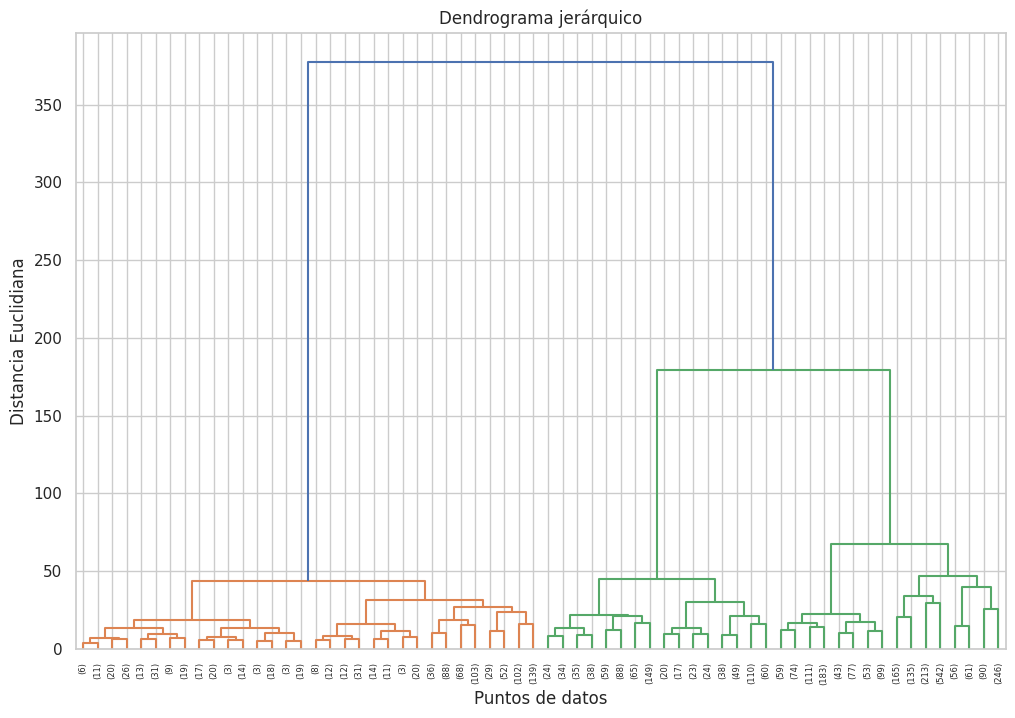

In [17]:

# Crear la matriz de distancias usando linkage
linkage_matrix = linkage(gym_scaled, method='ward')  # Método 'ward' minimiza la varianza dentro de los clústeres

# Trazar el dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)  # Mostrar solo los primeros niveles para mayor claridad
plt.title('Dendrograma jerárquico')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

## Análisis del dendrograma:
**Interpretación:**

- En el gráfico se observan dos divisiones principales a una distancia alrededor de 300-350, lo que sugiere dos clústeres principales.
- Dentro de cada clúster principal, se pueden identificar subgrupos más pequeños dependiendo del nivel de detalle deseado:
  - En el grupo verde (derecha), podrían destacarse dos subgrupos principales.
  - En el grupo naranja (izquierda), se observan múltiples ramas pequeñas, lo que indica mayor homogeneidad en sus datos.


**Estimación del número de clústeres:**

- Según el dendrograma, dos a tres clústeres parecen ser una buena elección para analizar diferencias significativas.
- Si se desea mayor granularidad, se pueden explorar cuatro o cinco clústeres considerando las subdivisiones internas.

## *Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)*

In [18]:

# Inicializar el modelo K-means con n=5
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajustar el modelo a los datos estandarizados
kmeans.fit(gym_scaled[columns_to_scale])  # Asegúrate de que 'columns_to_scale' esté correctamente definido

# Predecir los clústeres para cada cliente
gym['cluster'] = kmeans.labels_

# Visualizar el número de clientes en cada clúster
print("Cantidad de clientes por clúster:")
cluster_counts = gym['cluster'].value_counts()
display(cluster_counts)

# Verificar los centroides de los clústeres
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=columns_to_scale)
print("\nCentroides de los clústeres:")
display(centroids)

# Evaluar la inercia del modelo
print(f"\nInercia del modelo (suma de distancias internas al clúster): {kmeans.inertia_:.2f}")


Cantidad de clientes por clúster:


,count
cluster,
0,1011
1,910
3,827
2,680
4,572



Centroides de los clústeres:


,age,lifetime,month_to_end_contract,avg_class_frequency_total,avg_class_frequency_current_month,avg_additional_charges_total
0,-0.968571,-0.609156,-0.619396,-0.599234,-0.772627,-0.327553
1,0.656155,-0.026828,-0.565791,-0.224268,-0.190696,-0.351283
2,0.248581,0.389603,1.467345,0.598745,0.651322,0.018253
3,0.139042,0.173093,-0.380843,1.227481,1.241539,0.286787
4,0.171505,0.405931,0.801122,-1.070566,-0.900337,0.701467



Inercia del modelo (suma de distancias internas al clúster): 13568.35


## Análisis simplificado:
El modelo de K-means dividió a los clientes en 5 clústeres con las siguientes distribuciones: 1,011 clientes en el clúster 0, 910 en el clúster 1, 827 en el clúster 2, 680 en el clúster 3 y 572 en el clúster 4. Los centroides indican las características promedio de cada clúster:

- Clúster 0: Clientes con menor tiempo en el gimnasio (lifetime) y frecuencia baja de visitas tanto histórica como actual.
- Clúster 1: Similar al clúster 0, pero con una frecuencia de visitas ligeramente mayor.
- Clúster 2: Alta frecuencia histórica de visitas y gastos adicionales moderados.
- Clúster 3: Alta frecuencia de visitas en el mes actual y mayor gasto adicional.
- Clúster 4: Contratos más largos, pero baja frecuencia de visitas reciente.

Este análisis puede ser útil para diseñar estrategias personalizadas de retención y promoción para cada clúster.



## *Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?*

## Valores medios de las características por clúster
- **Clúster 0 y Clúster 1: Estos clústeres comparten características similares, como un menor tiempo en el gimnasio y una baja frecuencia de visitas. Sin embargo, el clúster 1 muestra una frecuencia de visitas ligeramente mayor que el clúster 0. Esto podría indicar que, aunque ambos grupos son nuevos o tienen poca experiencia en el gimnasio, los clientes del clúster 1 podrían estar en una fase de exploración o interés renovado, lo que puede abrir oportunidades para estrategias de retención enfocadas en incrementar la frecuencia de visitas.**

- **Clúster 2: Este clúster tiene una alta frecuencia histórica de visitas y gastos adicionales moderados. Esto sugiere que estos clientes ya tienen un compromiso significativo con el gimnasio, pero no están necesariamente maximizando sus gastos en servicios adicionales. Una estrategia podría ser incentivar a este grupo a explorar más servicios adicionales (como entrenamientos personales o suplementos) para maximizar su valor.**

- **Clúster 3: Los clientes en este clúster tienen una alta frecuencia de visitas en el mes actual y un mayor gasto adicional, lo que indica un grupo altamente comprometido y activo. Este es probablemente el clúster más valioso, y las estrategias deberían centrarse en mantener este alto nivel de actividad y gasto, posiblemente ofreciendo descuentos exclusivos o programas de fidelización.**

- **Clúster 4: Aunque estos clientes tienen contratos más largos, su baja frecuencia de visitas reciente es algo preocupante. Esto podría indicar que, aunque estos clientes se inscribieron con la intención de comprometerse a largo plazo, su interés o motivación ha disminuido. Este clúster podría ser el objetivo principal para estrategias de retención, como ofrecer promociones para mejorar la frecuencia de visitas o contactar a los clientes con sesiones de seguimiento para reavivar su interés.**

En resumen, las diferencias en frecuencia de visitas y gasto adicional entre los clústeres son las características más notables. Los clústeres 0 y 1 podrían necesitar intervenciones para aumentar su frecuencia de visitas, mientras que el clúster 4 podría necesitar acciones para evitar que abandonen el gimnasio debido a la falta de motivación reciente.

## *Traza distribuciones de características para los clústeres. ¿Notas algo?*

<ipython-input-21-2dd119720f96>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gym, x='cluster', y=feature, palette='viridis')
<ipython-input-21-2dd119720f96>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gym, x='cluster', y=feature, palette='viridis')
<ipython-input-21-2dd119720f96>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gym, x='cluster', y=feature, palette='viridis')
<ipython-input-21-2dd119720f96>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

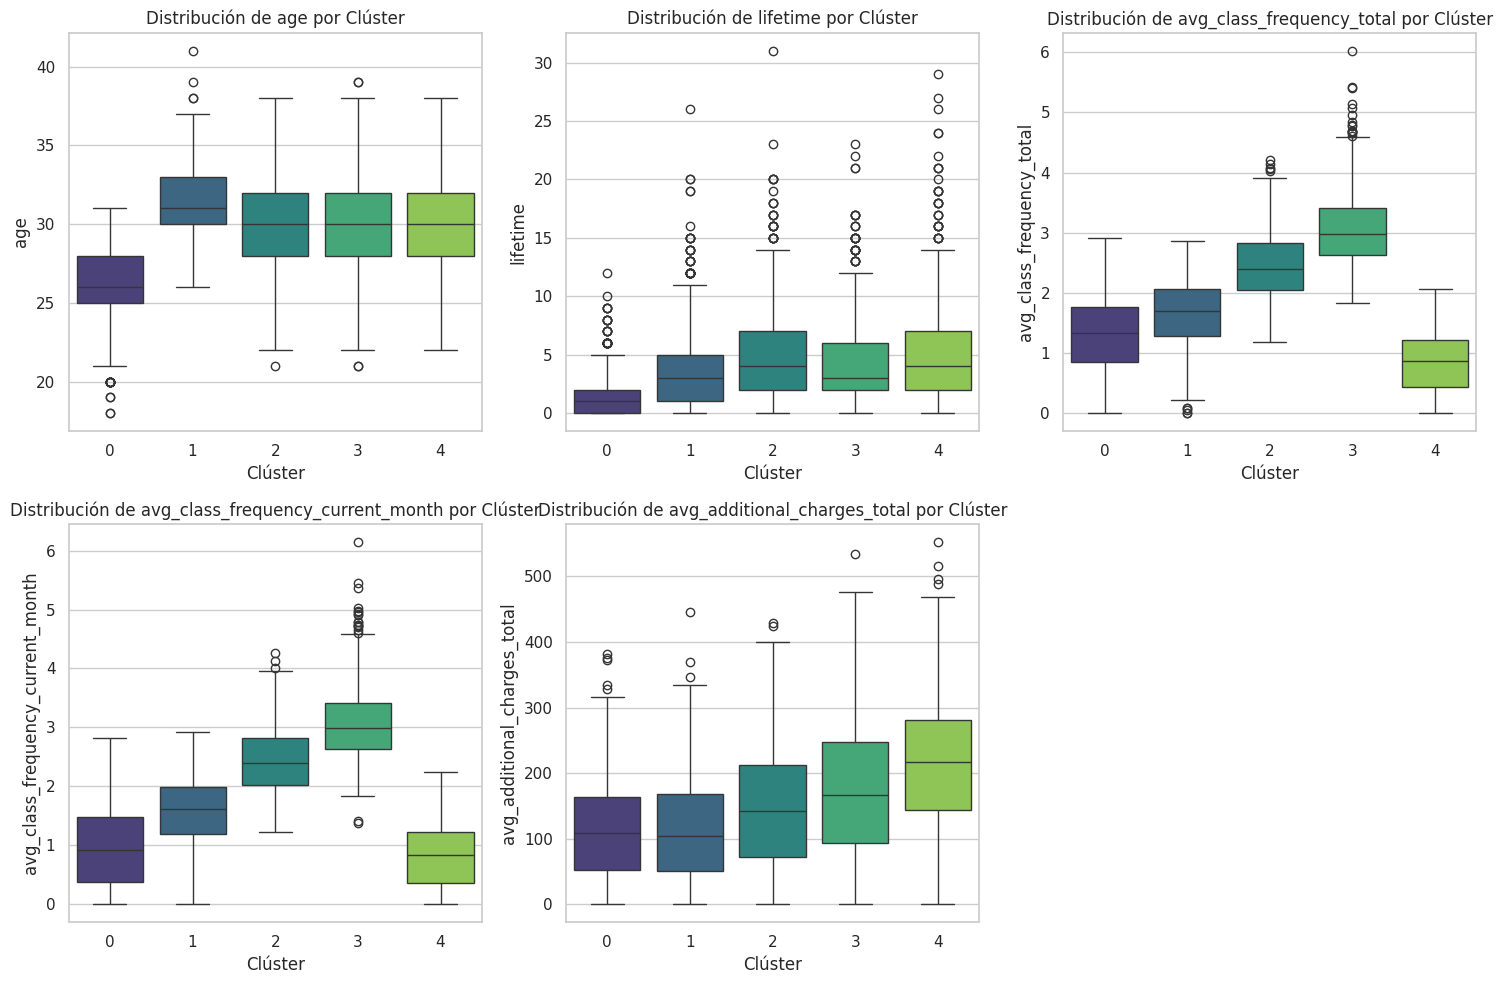

In [21]:
# Lista de características que deseas analizar

features = ['age', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'avg_additional_charges_total']

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Crear un gráfico para cada característica
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # Configura la disposición de los subgráficos
    sns.boxplot(data=gym, x='cluster', y=feature, palette='viridis')
    plt.title(f'Distribución de {feature} por Clúster')
    plt.xlabel('Clúster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

## **Observaciones por característica:**
**age (Edad):**

- El Clúster 0 tiene usuarios más jóvenes en comparación con los demás.
- Los clústeres 1, 2, 3 y 4 muestran edades más altas y similares entre ellos, aunque el Clúster 4 parece inclinarse ligeramente hacia edades mayores.

**lifetime (Tiempo como cliente):**

- El Clúster 0 tiene los valores más bajos, indicando clientes con menor tiempo en el gimnasio.
- Los clústeres 1, 2, 3 y 4 tienen una distribución más amplia, con el Clúster 4 mostrando tiempos más largos en general.

**avg_class_frequency_total (Frecuencia promedio histórica):**

- El Clúster 0 muestra la frecuencia más baja.
- El Clúster 3 tiene la mayor frecuencia histórica, seguido del Clúster 2. Esto sugiere que los usuarios en estos clústeres son más constantes en su uso del gimnasio.

**avg_class_frequency_current_month (Frecuencia promedio actual):**

- El Clúster 0 nuevamente tiene la frecuencia más baja.
- El Clúster 3 tiene la mayor frecuencia actual, lo que indica usuarios que han incrementado o mantenido su uso recientemente.
**avg_additional_charges_total (Gastos adicionales):**

- El Clúster 0 tiene los gastos adicionales más bajos.
- El Clúster 3 y el Clúster 4 muestran los valores más altos, lo que podría implicar que estos usuarios son más propensos a consumir servicios adicionales como clases especiales o productos en el gimnasio.

**Conclusiones generales:**
- Clúster 0: Se caracteriza por clientes jóvenes, con poco tiempo en el gimnasio y baja frecuencia de visitas, tanto histórica como actual, y bajo gasto adicional. Podrían ser nuevos clientes o clientes con bajo compromiso.
- Clúster 3: Representa a los usuarios más comprometidos, con alta frecuencia de visitas tanto histórica como reciente y mayores gastos adicionales. Estos usuarios son probablemente el grupo más rentable para el gimnasio.
- Clúster 4: Tiene clientes con contratos más largos, pero con menor frecuencia de visitas actual. Podrían ser clientes inactivos o con un nivel de compromiso en declive, a pesar de sus altos gastos adicionales.
- Clústeres 1 y 2: Tienen características intermedias, siendo el Clúster 2 más consistente históricamente en la frecuencia de visitas.


## *Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?*

In [23]:
# Calcular el número de usuarios por clúster y el número de cancelaciones
cancel_rate = gym.groupby('cluster')['churn'].mean()

display(cancel_rate)


,churn
cluster,
0,0.752720
1,0.224176
2,0.017647
3,0.064087
4,0.054196


# **¿Difieren en términos de tasa de cancelación?**
Sí, hay una diferencia significativa en las tasas de cancelación entre los clústeres:

- Clúster 0 tiene una tasa de cancelación muy alta, con el 75.27% de usuarios que cancelaron.
- Clúster 1 muestra una tasa considerablemente menor, con el 22.42%.
- Clústeres 2, 3 y 4 tienen tasas de cancelación muy bajas, con un rango entre 1.76% y 6.41%, siendo el clúster 4 el más leal con solo un 5.42%.

Esto indica que los usuarios en diferentes clústeres se comportan de manera distinta en cuanto a su probabilidad de cancelar.

# **¿Qué grupos son propensos a irse y cuáles son leales?**

- Grupos Propensos a Irse:

  - Clúster 0: Este grupo tiene una tasa de cancelación extremadamente alta (75.27%), lo que indica que la mayoría de los usuarios en este clúster son propensos a cancelar. Es un grupo crítico que necesita atención inmediata.
- Grupos Leales:

  - Clúster 4: Este grupo tiene la tasa de cancelación más baja (5.42%), lo que indica una alta fidelidad.
  - Clústeres 2 y 3: También tienen bajas tasas de cancelación (1.76% y 6.41%, respectivamente), lo que los convierte en grupos leales.

- Implicaciones y Estrategias
  - Para el Clúster 0:

    - Identifica características comunes en este grupo para entender por qué cancelan (edad, frecuencia de visitas, duración del contrato, etc.).
    - Implementa estrategias de retención, como descuentos, comunicación personalizada o incentivos.

- Para los Clústeres Leales (4, 2, 3):

- Mantén la satisfacción de estos grupos con incentivos de fidelidad, programas de recompensas o mejoras en la experiencia del cliente.
- Usa este análisis para replicar características positivas de estos grupos en otros clústeres.


# Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes
## *Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.*

## **Conclusiones Extendidas**
El análisis realizado permitió identificar factores clave que influyen en la cancelación de usuarios en el gimnasio, así como segmentar a los clientes en grupos distintos con comportamientos característicos. Los resultados indican que la proximidad geográfica, la duración del contrato, la frecuencia de asistencia y el uso de promociones son determinantes importantes para reducir la probabilidad de cancelación. En particular, los usuarios con contratos largos y hábitos regulares de visita son menos propensos a abandonar el servicio. Por el contrario, los clientes jóvenes, nuevos en el gimnasio, con baja frecuencia de visitas y que gastan poco en servicios adicionales tienden a cancelar con mayor frecuencia.

La construcción de modelos predictivos, incluyendo la Regresión Logística y el Bosque Aleatorio, permitió alcanzar una precisión superior al 90% en la predicción de cancelaciones. La Regresión Logística mostró un mejor desempeño en la identificación de usuarios en riesgo de cancelar, lo que la convierte en una herramienta clave para intervenciones tempranas. Además, la segmentación de usuarios en cinco clústeres aportó un entendimiento más profundo de las diferencias entre los clientes, revelando patrones de comportamiento que guían la personalización de estrategias de retención.

De los cinco clústeres identificados, el grupo con mayor riesgo de cancelación fue el Clúster 0, compuesto principalmente por jóvenes con baja frecuencia de visitas y contratos cortos. Este grupo presenta una tasa de cancelación del 75.27%, lo que lo convierte en el foco principal de atención para las estrategias de retención. Por otro lado, el Clúster 4, que incluye usuarios con contratos más largos y un historial más estable, fue identificado como el grupo más leal, aunque su frecuencia de visitas reciente es menor. Estos usuarios representan una base sólida y confiable para los ingresos del gimnasio.

Las tasas de cancelación varían significativamente entre los diferentes clústeres, lo que valida la importancia de diseñar estrategias específicas para cada grupo. Los datos obtenidos sugieren que una estrategia única para todos los clientes sería ineficaz y que un enfoque segmentado puede maximizar la retención y mejorar la satisfacción del cliente.

## **Recomendaciones Extendidas**
A partir de los resultados obtenidos, se recomienda desarrollar estrategias específicas adaptadas a las necesidades de cada grupo de clientes. En el caso del Clúster 0, es fundamental implementar acciones orientadas a mejorar la interacción inicial y fomentar el compromiso de los usuarios desde el principio. Por ejemplo, se puede diseñar un programa de bienvenida que incluya sesiones de orientación gratuitas con un entrenador, así como invitaciones a clases grupales para que los usuarios se sientan integrados en la comunidad. Adicionalmente, sería beneficioso introducir un sistema de recompensas inmediatas, como descuentos o premios, por asistir regularmente durante el primer mes.

Para este mismo grupo, es crucial promover el uso de contratos más largos mediante ofertas específicas y diseñar planes flexibles que permitan pausas temporales en lugar de cancelaciones definitivas. Una atención personalizada, como asignar un punto de contacto específico para cada usuario, también podría marcar una diferencia significativa en la retención de este segmento.

Por otro lado, los usuarios leales, representados principalmente por el Clúster 4, requieren estrategias de fidelización que refuercen su sentido de pertenencia y recompensen su compromiso con el gimnasio. Estas estrategias podrían incluir programas de beneficios exclusivos, descuentos en renovaciones de contrato o acceso a servicios premium como entrenamientos personalizados. También se podrían organizar eventos exclusivos para este grupo, fortaleciendo su vínculo con la comunidad del gimnasio.

De manera general, se recomienda implementar una estrategia de marketing optimizada que utilice los perfiles de los clústeres para dirigir campañas específicas. Por ejemplo, se pueden diseñar promociones de retención específicas para el Clúster 0, mientras que las campañas dirigidas a los Clústeres 2, 3 y 4 podrían enfocarse en reforzar la lealtad. Es importante mejorar la experiencia general del cliente mediante la ampliación de opciones de clases grupales, la introducción de servicios adicionales atractivos y la creación de contenido educativo que motive a los usuarios a mantenerse activos.

Además, se sugiere establecer un sistema de seguimiento proactivo que utilice los modelos predictivos para identificar a los usuarios en riesgo de cancelar y tomar medidas preventivas. Esto incluye enviar notificaciones personalizadas, realizar llamadas después de periodos de inactividad prolongados y monitorear las tasas de cancelación mensualmente para ajustar las estrategias según sea necesario.

Finalmente, es esencial medir el impacto de las estrategias implementadas a través de métricas claras de éxito, como la reducción en la tasa de cancelación, el aumento en la duración promedio de los contratos y la mejora en la frecuencia de visitas. La evaluación continua permitirá realizar ajustes en tiempo real y garantizar que las estrategias de retención sigan siendo efectivas en el largo plazo. Este enfoque integral no solo retendrá a los clientes actuales, sino que también mejorará su percepción del gimnasio como un lugar comprometido con su bienestar y desarrollo personal.